## Grid Search Hyperparameter optimization

This case study is all about using grid searches to identify the optimal parameters for a machine learning algorithm. To complere this case study, you'll use the Pima Indian diabetes dataset from Kaggle and KNN. Follow along with the preprocessing steps of this case study.

Load the necessary packages

In [197]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# set random seed to try make this exercise and solutions reproducible (NB: this is just for teaching purpose and not something you would do in real life)
random_seed_number = 42
np.random.seed(random_seed_number)

#### Load the diabetes data

In [198]:
diabetes_data = pd.read_csv('data/diabetes.csv')
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**<font color='teal'> Start by reviewing the data info.</font>**

In [199]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**<font color='teal'> Apply the describe function to the data.</font>**

In [200]:
diabetes_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


**<font color='teal'> Currently, the missing values in the dataset are represented as zeros. Replace the zero values in the following columns ['Glucose','BloodPressure','SkinThickness','Insulin','BMI'] with nan .</font>**

In [201]:
for col in ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']:
    c = diabetes_data.loc[diabetes_data[col]==0, col].count()
    print(f"There are {c} zeros in {col}")

There are 5 zeros in Glucose
There are 35 zeros in BloodPressure
There are 227 zeros in SkinThickness
There are 374 zeros in Insulin
There are 11 zeros in BMI


In [202]:
for col in ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']:
    diabetes_data.loc[diabetes_data[col]==0, col] = np.nan

diabetes_data.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

**<font color='teal'> Plot histograms of each column. </font>**

In [203]:
diabetes_data.select_dtypes('float64').columns

Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction'],
      dtype='object')

In [204]:
sns.set(style="darkgrid")

def plot_histograms(df):
    fig, axs = plt.subplots(2, 3, figsize=(20, 7))
    colors = ['skyblue', 'olive', 'gold', 'teal', 'cyan', 'red']
    i = j = c = 0
    for col in df.select_dtypes('float64').columns:
        sns.histplot(data=df, x=col, label=col, kde=True, color=colors[c], ax=axs[i,j])
        j += 1
        c +=1
        if j >= 3:
            j=0
            i += 1

plt.show()

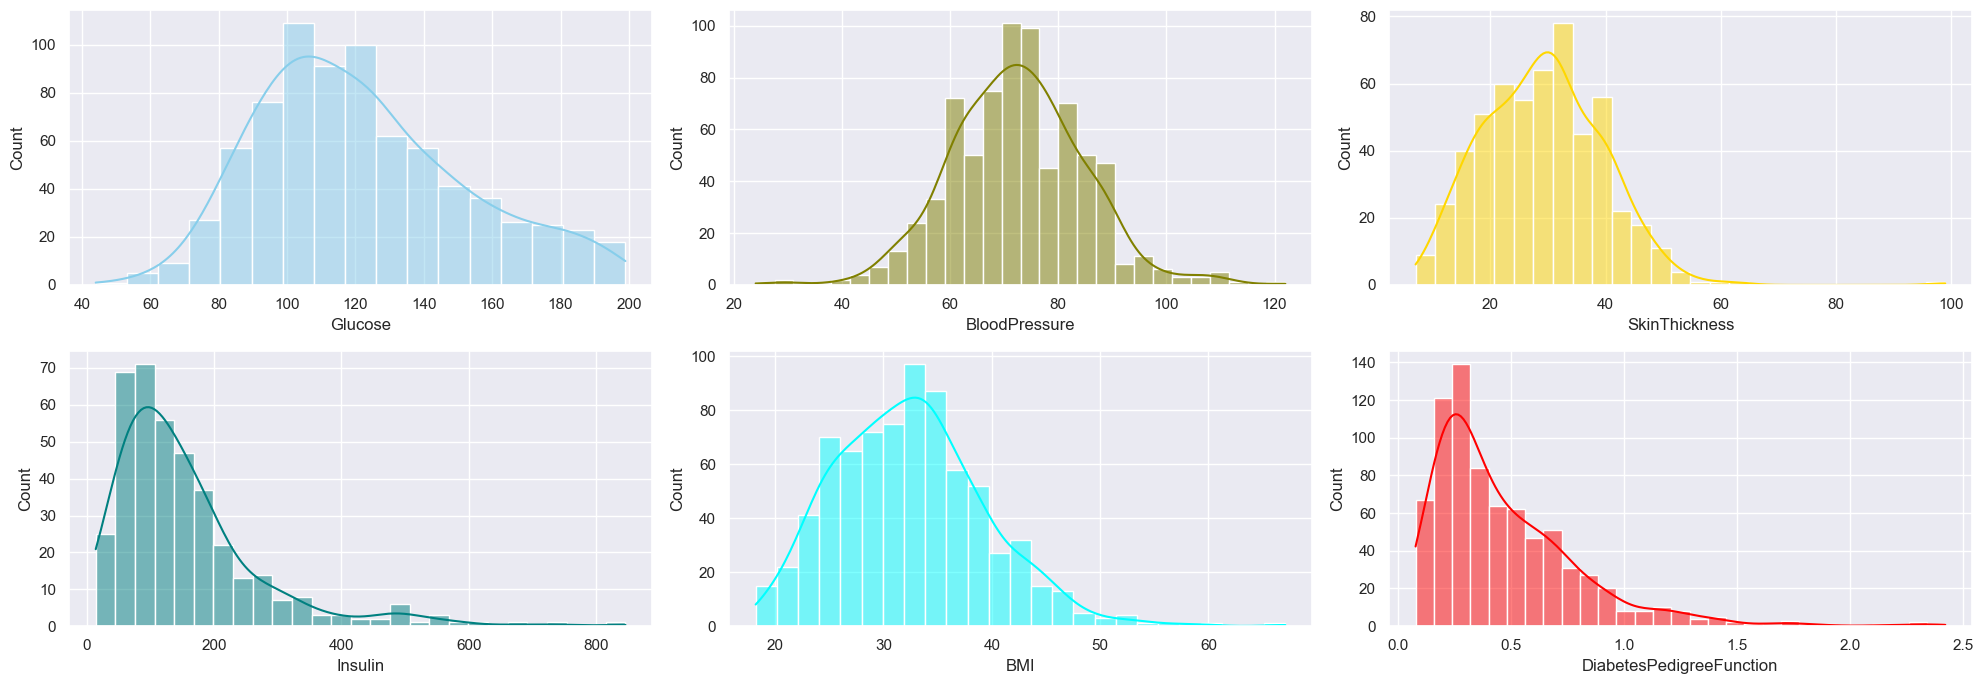

In [205]:
plot_histograms(diabetes_data)

#### Replace the zeros with mean and median values.

In [206]:
diabetes_data['Glucose'].fillna(diabetes_data['Glucose'].mean(), inplace = True)
diabetes_data['BloodPressure'].fillna(diabetes_data['BloodPressure'].mean(), inplace = True)
diabetes_data['SkinThickness'].fillna(diabetes_data['SkinThickness'].median(), inplace = True)
diabetes_data['Insulin'].fillna(diabetes_data['Insulin'].median(), inplace = True)
diabetes_data['BMI'].fillna(diabetes_data['BMI'].median(), inplace = True)

**<font color='teal'> Plot histograms of each column after replacing nan. </font>**

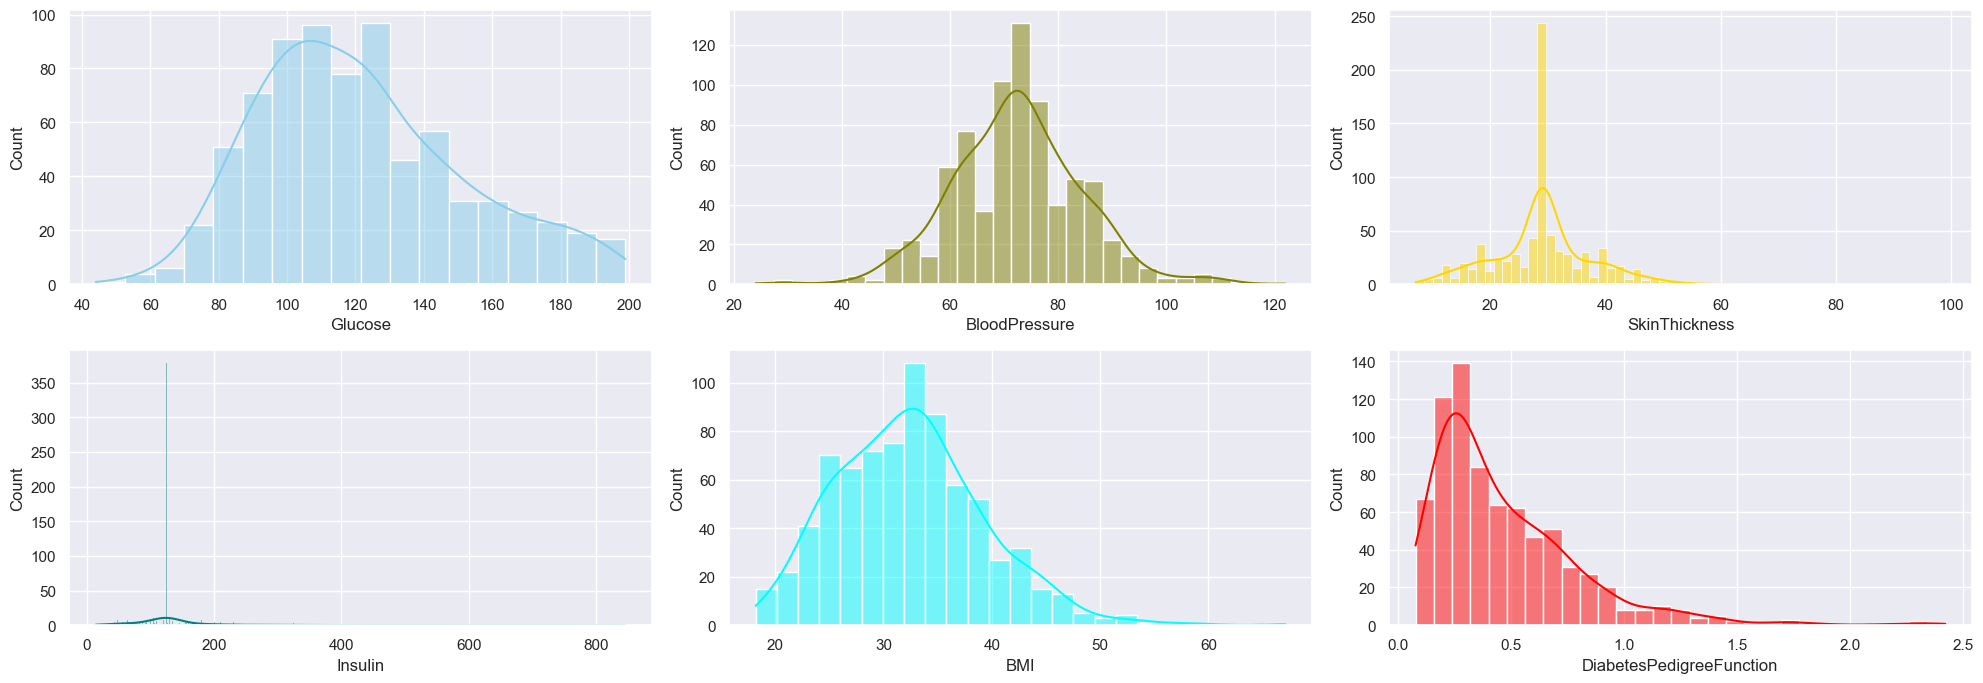

In [207]:
plot_histograms(diabetes_data)

#### Plot the correlation matrix heatmap

Correlation between various features


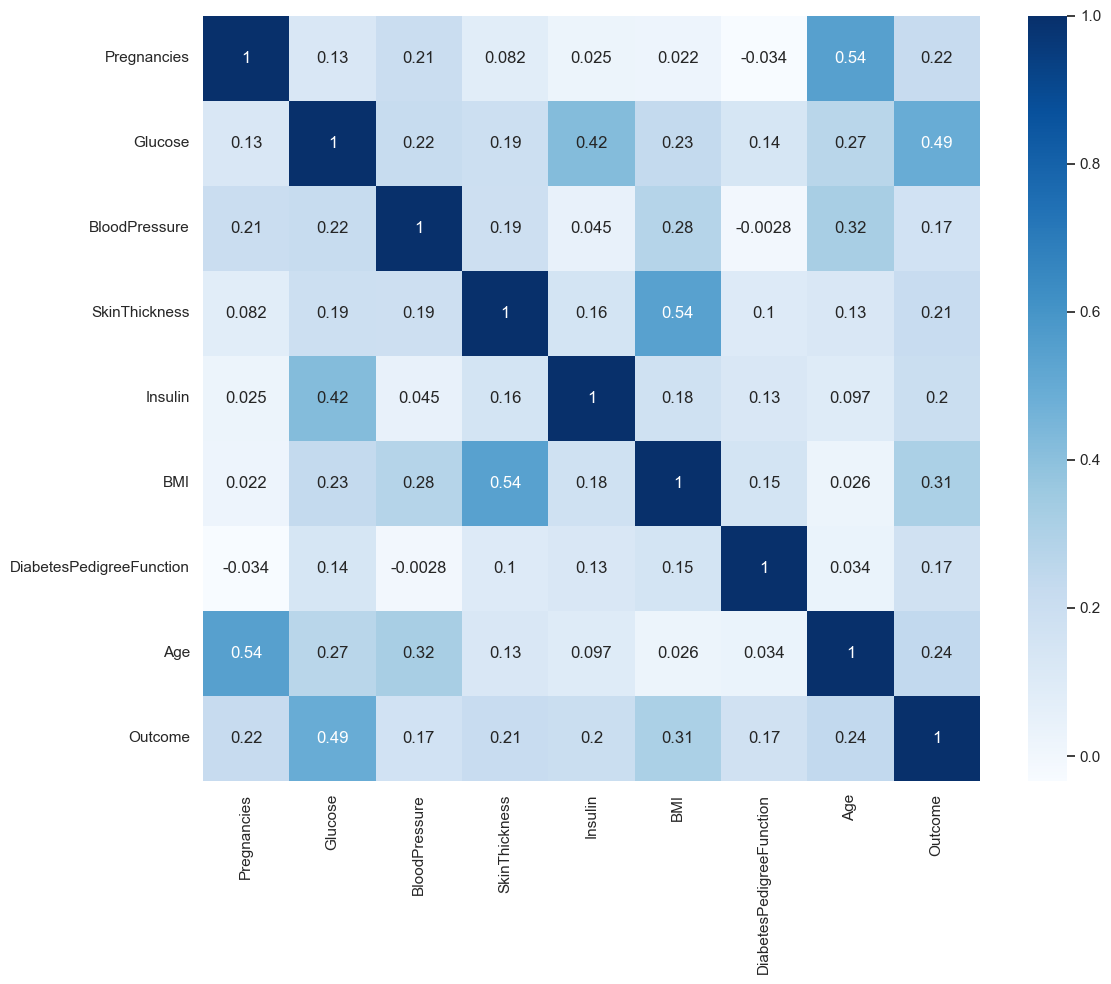

In [208]:
plt.figure(figsize=(12,10))
print('Correlation between various features')
p=sns.heatmap(diabetes_data.corr(), annot=True,cmap ='Blues')

**<font color='teal'> Define the `y` variable as the `Outcome` column.</font>**

In [209]:
X = diabetes_data.drop(columns=['Outcome'])
y = diabetes_data.Outcome
print(diabetes_data.shape)
print(X.shape)
print(y.shape)


(768, 9)
(768, 8)
(768,)


**<font color='teal'> Create a 70/30 train and test split. </font>**

In [210]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)
assert(X_train.shape[0] == y_train.shape[0])
assert(X_test.shape[0] == y_test.shape[0])
assert(X_train.shape[1] + 1 == diabetes_data.shape[1])
assert(X_test.shape[1] + 1 == diabetes_data.shape[1])
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(537, 8)
(537,)
(231, 8)
(231,)


**<font color='teal'> Using Sklearn, standarize the magnitude of the features by scaling the values. </font>**

Note: Don't forget to fit() your scaler on X_train and then use that fitted scaler to transform() X_test. This is to avoid data leakage while you standardize your data.

In [211]:
from sklearn.preprocessing import StandardScaler


columns = X_train.columns
scaler = StandardScaler()
scaled_matrix = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(scaled_matrix, columns=columns)

scaled_matrix = scaler.fit_transform(X_test)
X_test_scaled = pd.DataFrame(scaled_matrix, columns=columns)
X_test_scaled

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.523387,-0.739446,-1.248465,0.324002,0.568836,0.169916,-0.152282,0.786051
1,-0.590921,-0.289349,0.188237,0.217990,-0.183615,0.425767,-1.077306,-1.059081
2,-0.590921,-0.417948,-0.741393,-0.100046,-0.183615,-0.311686,-1.044503,-1.059081
3,1.080541,-0.450098,0.610797,-0.100046,-0.183615,-1.244790,1.245094,0.031224
4,0.801964,0.482248,1.455915,-0.100046,-0.183615,-0.447137,-0.873932,1.373138
...,...,...,...,...,...,...,...,...
226,-1.148075,-0.064300,-0.031056,-0.100046,-0.183615,-0.070885,-1.100267,-0.807472
227,-0.033767,-0.385798,-0.741393,1.490134,-0.484595,0.290316,1.405825,-0.639733
228,-1.148075,0.192899,0.610797,0.748050,0.800359,0.516067,1.074522,-0.891341
229,0.523387,-0.514398,-0.234322,0.217990,-0.843457,-0.311686,-1.162591,0.282833


#### Using a range of neighbor values of 1-10, apply the KNearestNeighbor classifier to classify the the data.

In [212]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,10):

    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_scaled,y_train)
    
    train_scores.append( knn.score(X_train_scaled,y_train))
    test_scores.append( knn.score(X_test_scaled,y_test))

**<font color='teal'> Print the train and test scores for each iteration.</font>**

In [213]:
train_scores

[1.0,
 0.851024208566108,
 0.8547486033519553,
 0.8417132216014898,
 0.839851024208566,
 0.8230912476722533,
 0.8342644320297952,
 0.8212290502793296,
 0.8268156424581006]

**<font color='teal'> Identify the number of neighbors that resulted in the max score in the training dataset. </font>**

**<font color='teal'> Identify the number of neighbors that resulted in the max score in the testing dataset. </font>**

2 or 3

Plot the train and test model performance by number of neighbors.

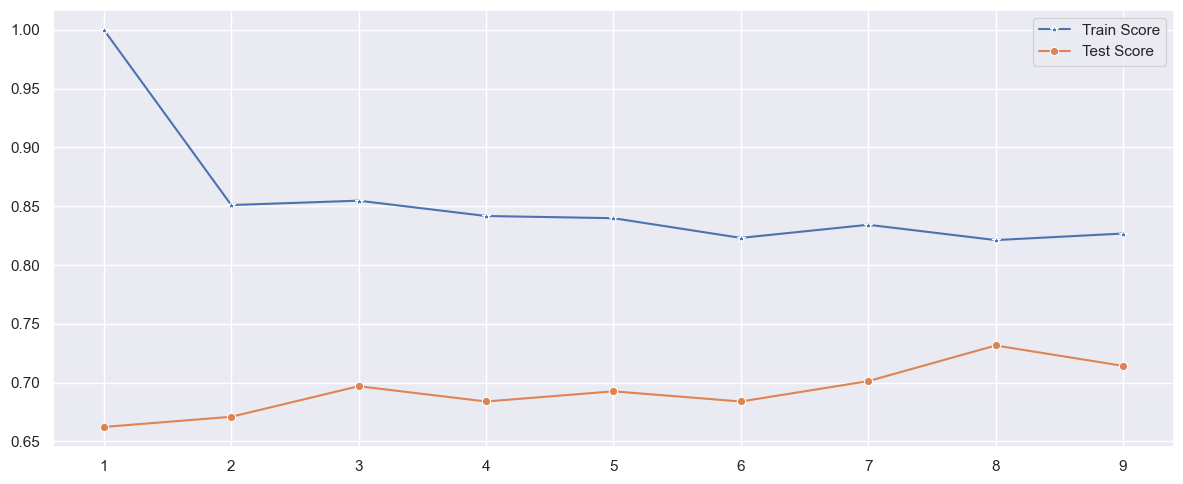

In [215]:
plt.figure(figsize=(12,5))
p = sns.lineplot(x=range(1,10),y=train_scores, marker='*',label='Train Score')
p = sns.lineplot(x=range(1,10),y=test_scores, marker='o',label='Test Score')

**<font color='teal'> Fit and score the best number of neighbors based on the plot. </font>**

In [216]:
# Importing and fitting KNN classifier for k=3
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train_scaled,y_train)
# Predicting results using Test data set
pred = knn.predict(X_test_scaled)

ac = accuracy_score(pred,y_test)
print("Accuracy", ac)


y_pred = knn.predict(X_test_scaled)
cm = confusion_matrix(y_test,y_pred)
print("Confusion Matrix")
cm


Accuracy 0.670995670995671
Confusion Matrix


array([[131,  20],
       [ 56,  24]])

**<font color='teal'> Plot the confusion matrix for the model fit above. </font>**

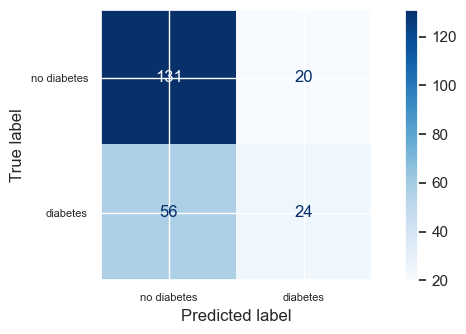

In [217]:
from sklearn.metrics import ConfusionMatrixDisplay

_, ax = plt.subplots()
display_cm = ConfusionMatrixDisplay(confusion_matrix = cm,
                                    display_labels = ['no diabetes', 'diabetes'])

ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(labels = ['no diabetes', 'diabetes'], fontsize = 8)
ax.set_yticklabels(labels = ['no diabetes', 'diabetes'], fontsize = 8)
display_cm.plot(ax = ax, cmap='Blues')

**<font color='teal'> Print the classification report </font>**

In [218]:
print("[Training Classification Report]")
print(classification_report(y_test, y_pred))


[Training Classification Report]
              precision    recall  f1-score   support

           0       0.70      0.87      0.78       151
           1       0.55      0.30      0.39        80

    accuracy                           0.67       231
   macro avg       0.62      0.58      0.58       231
weighted avg       0.65      0.67      0.64       231



#### In the case of the K nearest neighbors algorithm, the K parameter is one of the most important parameters affecting the model performance.  The model performance isn't horrible, but what if we didn't consider a wide enough range of values in our neighbors for the KNN? An alternative to fitting a loop of models is to use a grid search to identify the proper number. It is common practice to use a grid search method for all adjustable parameters in any type of machine learning algorithm. First, you define the grid — aka the range of values — to test in the parameter being optimized, and then compare the model outcome performance based on the different values in the grid.

#### Run the code in the next cell to see how to implement the grid search method for identifying the best parameter value for the n_neighbors parameter. Notice the param_grid is the range value to test and we apply cross validation with five folds to score each possible value of n_neighbors.

In [219]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

#### Print the best score and best parameter for n_neighbors.

In [195]:
print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.7526440879382056
Best Parameters: {'n_neighbors': 31}


Here you can see that the ideal number of n_neighbors for this model is 14 based on the grid search performed. 

**<font color='teal'> Now, following the KNN example, apply this grid search method to find the optimal number of estimators in a Randon Forest model.
</font>**

In [220]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {'n_estimators':np.arange(1,50)}

rfc = RandomForestClassifier()

rf_cv= GridSearchCV(rfc, param_grid, cv=5, verbose=True)
rf_cv.fit(X,y)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))


Fitting 5 folds for each of 49 candidates, totalling 245 fits
Best Score:0.7526440879382056
Best Parameters: {'n_neighbors': 31}
